In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read Data 

In [266]:
health_care_data = pd.read_csv('Health_Care_1.csv')

/var/folders/8c/pc9_g8b96hs6d8ycg72172200000gn/T/ipykernel_73408/3543527532.py:1: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



In [267]:
health_care_data.head()

State          County Metal Level                               Issuer Name  \
0    AK  ALEUTIANS EAST      Bronze  Premera Blue Cross Blue Shield of Alaska   
1    AK  ALEUTIANS EAST      Silver  Premera Blue Cross Blue Shield of Alaska   
2    AK  ALEUTIANS EAST        Gold  Premera Blue Cross Blue Shield of Alaska   
3    AK  ALEUTIANS EAST        Gold  Premera Blue Cross Blue Shield of Alaska   
4    AK  ALEUTIANS EAST      Silver  Premera Blue Cross Blue Shield of Alaska   

  Plan ID - Standard Component  \
0               38344AK0570001   
1               38344AK0570002   
2               38344AK0600002   
3               38344AK0600003   
4               38344AK0600004   

                                 Plan Marketing Name Plan Type    Rating Area  \
0  Blue Cross Blue Shield Plus 5250 HSA High, a M...       PPO  Rating Area 2   
1  Blue Cross Blue Shield Plus 2500 HSA High, a M...       PPO  Rating Area 2   
2  Blue Cross Blue Shield Select 1000, a Multi-St...       PPO  Rating Area 2   
3  Blue Cross Blue Shield Select 1500, a Multi-St...       PPO  Rating Area 2   
4  Blue Cross Blue Shield Select 2000, a Multi-St...       PPO  Rating Area 2   

           Child Only Offering Source  ...  \
0  Allows Adult and Child-Only    OPM  ...   
1  Allows Adult and Child-Only    OPM  ...   
2  Allows Adult and Child-Only    OPM  ...   
3  Allows Adult and Child-Only    OPM  ...   
4  Allows Adult and Child-Only    OPM  ...   

  Drug Maximum Out of Pocket - Family  - 94 percent  \
0                                               NaN   
1                               Included in Medical   
2                                               NaN   
3                                               NaN   
4                               Included in Medical   

  Primary Care Physician - 94 percent           Specialist - 94 percent  \
0                                 NaN                               NaN   
1    20% Coinsurance after deductible  20% Coinsurance after deductible   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 $20                               $20   

        Emergency Room - 94 percent  Inpatient Facility  - 94 percent  \
0                               NaN                               NaN   
1  20% Coinsurance after deductible  20% Coinsurance after deductible   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  20% Coinsurance after deductible  20% Coinsurance after deductible   

  Inpatient Physician  - 94 percent        Generic Drugs - 94 percent  \
0                               NaN                               NaN   
1  20% Coinsurance after deductible  20% Coinsurance after deductible   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  20% Coinsurance after deductible                               $10   

  Preferred Brand Drugs - 94 percent Non-preferred Brand Drugs - 94 percent  \
0                                NaN                                    NaN   
1   20% Coinsurance after deductible       20% Coinsurance after deductible   
2                                NaN                                    NaN   
3                                NaN                                    NaN   
4                                $30                                    $50   

       Specialty Drugs - 94 percent  
0                               NaN  
1  20% Coinsurance after deductible  
2                               NaN  
3                               NaN  
4  20% Coinsurance after deductible  

[5 rows x 128 columns]

# Finding the missng Values 

In [268]:
# Checking the percentage of missing values in each column
missing_values_percentage = health_care_data.isnull().mean() * 100

# Filtering columns with a significant amount of missing data (>50%) for analysis
high_missing_data_columns = missing_values_percentage[missing_values_percentage > 50]

# Displaying the percentage of missing values for these columns
high_missing_data_columns


Customer Service Phone Number TTY                           55.878488
Adult Dental                                                99.328902
Child Dental                                                66.224371
Premium Scenarios                                          100.000000
Standard Plan Cost Sharing                                 100.000000
73 Percent Actuarial Value Silver Plan Cost Sharing        100.000000
Medical Deductible - individual - 73 percent                66.960538
Drug Deductible - individual - 73 percent                   66.960538
Medical Deductible - family - 73 percent                    66.960538
Drug Deductible - family - 73 percent                       66.960538
Medical Maximum Out Of Pocket - individual - 73 percent     66.960538
Drug Maximum Out of Pocket - individual - 73 percent        66.960538
Medical Maximum Out of Pocket - family - 73 percent         66.960538
Drug Maximum Out of Pocket - Family - 73 percent            66.960538
Primary Care Physici

# Dropping columns with 100% missing values

In [269]:
# Dropping columns with 100% missing values
healthcare_data_cleaned = health_care_data.dropna(axis=1, how='all')

# Verifying the columns were removed by checking for any columns with 100% missing data in the cleaned dataset
remaining_full_missing_columns = healthcare_data_cleaned.isnull().mean() * 100
remaining_full_missing_columns = remaining_full_missing_columns[remaining_full_missing_columns == 100]

remaining_full_missing_columns, healthcare_data_cleaned.shape


(Series([], dtype: float64), (78379, 123))

In [270]:
# List of columns to remove based on the user's indication that they are not useful for analysis
columns_to_remove = [
    'Customer Service Phone Number Local', 
    'Customer Service Phone Number Toll Free', 
    'Customer Service Phone Number TTY', 
    'Network URL', 
    'Plan Brochure URL', 
    'Summary of Benefits URL', 
    'Drug Formulary URL', 
    'Adult Dental', 
    'Child Dental', 
    'Premium Scenarios'
]

# Dropping the specified columns from the dataset
healthcare_data_cleaned = healthcare_data_cleaned.drop(columns=columns_to_remove, errors='ignore')

# Confirming the new shape of the dataset after removing the columns
healthcare_data_cleaned.shape


(78379, 114)

In [271]:
# Updated selection of columns based on available names
selected_columns_refined = [
    'State', 'County', 'Metal Level', 'Plan Type',
    'Premium Child', 'Premium Adult Individual Age 21', 'Premium Adult Individual Age 27', 
    'Premium Adult Individual Age 30', 'Premium Adult Individual Age 40', 
    'Premium Adult Individual Age 50', 'Premium Adult Individual Age 60', 
    'Premium Couple 21  ', 'Premium Couple 30', 'Premium Couple 40', 
    'Premium Couple 50', 'Premium Couple 60',
    'Medical Deductible - individual - standard', 'Medical Deductible -family - standard',
    'Medical Maximum Out Of Pocket - individual - standard', 'Medical Maximum Out of Pocket - family - standard',
    'Primary Care Physician  - standard', 'Specialist  - standard', 'Emergency Room  - standard',
    'Generic Drugs - standard', 'Preferred Brand Drugs - standard', 'Non-preferred Brand Drugs - standard',
    'Specialty Drugs - standard'
]

# Filtering the dataset with refined column names
healthcare_data_filtered = healthcare_data_cleaned[selected_columns_refined]

# Checking the structure and missing values in the filtered dataset
filtered_missing_values = healthcare_data_filtered.isnull().mean() * 100
filtered_missing_values_summary = filtered_missing_values[filtered_missing_values > 0]

healthcare_data_filtered.shape, filtered_missing_values_summary


((78379, 27),
 Premium Child                      2.606566
 Premium Adult Individual Age 21    1.274576
 Premium Adult Individual Age 27    1.274576
 Premium Adult Individual Age 30    1.274576
 Premium Adult Individual Age 40    1.274576
 Premium Adult Individual Age 50    1.274576
 Premium Adult Individual Age 60    1.274576
 Premium Couple 21                  1.274576
 Premium Couple 30                  1.274576
 Premium Couple 40                  1.274576
 Premium Couple 50                  1.274576
 Premium Couple 60                  1.274576
 dtype: float64)

In [272]:
# Displaying information about the structure of the filtered dataset, including data types and non-null counts
healthcare_data_filtered.head()


State          County Metal Level Plan Type  Premium Child  \
0    AK  ALEUTIANS EAST      Bronze       PPO          178.0   
1    AK  ALEUTIANS EAST      Silver       PPO          211.0   
2    AK  ALEUTIANS EAST        Gold       PPO          259.0   
3    AK  ALEUTIANS EAST        Gold       PPO          255.0   
4    AK  ALEUTIANS EAST      Silver       PPO          240.0   

   Premium Adult Individual Age 21  Premium Adult Individual Age 27  \
0                            280.0                            294.0   
1                            333.0                            348.0   
2                            408.0                            427.0   
3                            401.0                            421.0   
4                            378.0                            396.0   

   Premium Adult Individual Age 30  Premium Adult Individual Age 40  \
0                            318.0                            358.0   
1                            377.0                            425.0   
2                            463.0                            521.0   
3                            456.0                            513.0   
4                            429.0                            483.0   

   Premium Adult Individual Age 50  ...  \
0                            501.0  ...   
1                            594.0  ...   
2                            729.0  ...   
3                            717.0  ...   
4                            674.0  ...   

   Medical Deductible -family - standard  \
0                                $10,500   
1                                 $5,000   
2                                 $2,000   
3                                 $3,000   
4                                 $4,000   

   Medical Maximum Out Of Pocket - individual - standard  \
0                                             $5,250       
1                                             $4,500       
2                                             $5,000       
3                                             $5,000       
4                                             $6,350       

   Medical Maximum Out of Pocket - family - standard  \
0                                            $10,500   
1                                             $9,000   
2                                            $10,000   
3                                            $10,000   
4                                            $12,700   

   Primary Care Physician  - standard            Specialist  - standard  \
0          No Charge after Deductible        No Charge after Deductible   
1    20% Coinsurance after deductible  20% Coinsurance after deductible   
2                                 $30                               $30   
3                                 $30                               $30   
4                                 $35                               $35   

         Emergency Room  - standard          Generic Drugs - standard  \
0        No Charge after Deductible        No Charge after Deductible   
1  20% Coinsurance after deductible  20% Coinsurance after deductible   
2  20% Coinsurance after deductible                               $10   
3  20% Coinsurance after deductible                               $10   
4  20% Coinsurance after deductible                               $15   

   Preferred Brand Drugs - standard Non-preferred Brand Drugs - standard  \
0        No Charge after Deductible           No Charge after Deductible   
1  20% Coinsurance after deductible     20% Coinsurance after deductible   
2                               $40                                  $80   
3                               $30                                  $80   
4                               $50                                 $100   

         Specialty Drugs - standard  
0        No Charge after Deductible  
1  20% Coinsurance after deductible  
2                               20%  
3                               20%  
4  3

In [274]:
# Checking column names to identify any inconsistencies, especially with the "Premium Couple 21" column
healthcare_data_filtered.columns.tolist()


['State',
 'County',
 'Metal Level',
 'Plan Type',
 'Premium Child',
 'Premium Adult Individual Age 21',
 'Premium Adult Individual Age 27',
 'Premium Adult Individual Age 30',
 'Premium Adult Individual Age 40',
 'Premium Adult Individual Age 50',
 'Premium Adult Individual Age 60',
 'Premium Couple 21  ',
 'Premium Couple 30',
 'Premium Couple 40',
 'Premium Couple 50',
 'Premium Couple 60',
 'Medical Deductible - individual - standard',
 'Medical Deductible -family - standard',
 'Medical Maximum Out Of Pocket - individual - standard',
 'Medical Maximum Out of Pocket - family - standard',
 'Primary Care Physician  - standard',
 'Specialist  - standard',
 'Emergency Room  - standard',
 'Generic Drugs - standard',
 'Preferred Brand Drugs - standard',
 'Non-preferred Brand Drugs - standard',
 'Specialty Drugs - standard']

# Imputing the Missing values

In [275]:
# Corrected list of premium columns, accounting for extra spaces in column names
premium_columns_with_missing_corrected = [
    'Premium Child', 'Premium Adult Individual Age 21', 'Premium Adult Individual Age 27', 
    'Premium Adult Individual Age 30', 'Premium Adult Individual Age 40', 
    'Premium Adult Individual Age 50', 'Premium Adult Individual Age 60', 
    'Premium Couple 21  ', 'Premium Couple 30', 'Premium Couple 40', 
    'Premium Couple 50', 'Premium Couple 60'
]

# Applying median imputation again with corrected column names
for column in premium_columns_with_missing_corrected:
    healthcare_data_filtered[column].fillna(healthcare_data_filtered[column].median(), inplace=True)

# Verifying that there are no more missing values in the premium columns
missing_values_after_imputation_corrected = healthcare_data_filtered[premium_columns_with_missing_corrected].isnull().sum()
missing_values_after_imputation_corrected


/var/folders/8c/pc9_g8b96hs6d8ycg72172200000gn/T/ipykernel_73408/3780297280.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Premium Child                      0
Premium Adult Individual Age 21    0
Premium Adult Individual Age 27    0
Premium Adult Individual Age 30    0
Premium Adult Individual Age 40    0
Premium Adult Individual Age 50    0
Premium Adult Individual Age 60    0
Premium Couple 21                  0
Premium Couple 30                  0
Premium Couple 40                  0
Premium Couple 50                  0
Premium Couple 60                  0
dtype: int64

# Checking for the Outliers

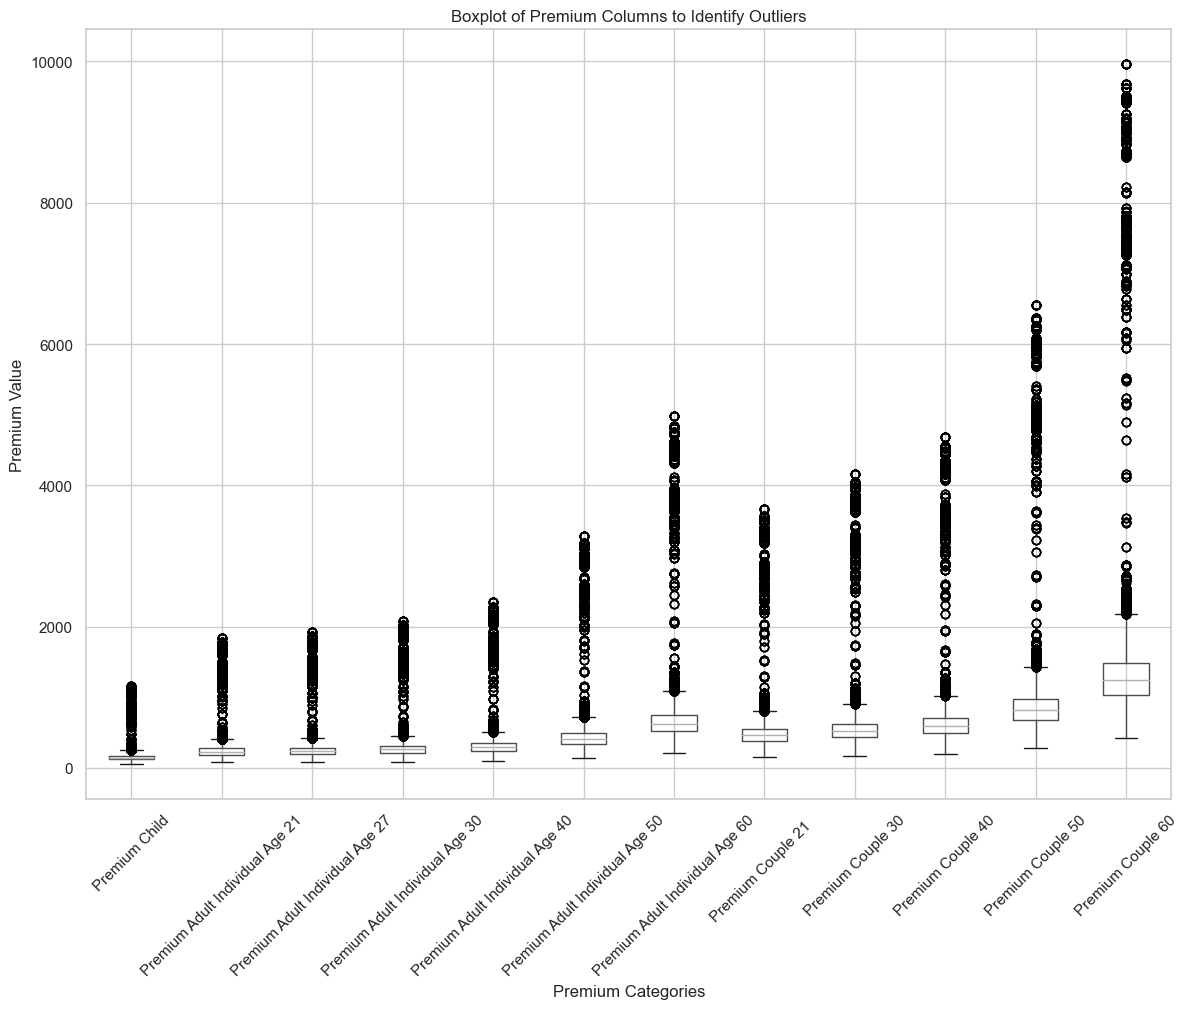

In [276]:

# Identifying outliers in premium columns using boxplots
premium_columns_to_check = [
    'Premium Child', 'Premium Adult Individual Age 21', 'Premium Adult Individual Age 27', 
    'Premium Adult Individual Age 30', 'Premium Adult Individual Age 40', 
    'Premium Adult Individual Age 50', 'Premium Adult Individual Age 60', 
    'Premium Couple 21  ', 'Premium Couple 30', 'Premium Couple 40', 
    'Premium Couple 50', 'Premium Couple 60'
]

# Creating boxplots for each premium column to visualize outliers
plt.figure(figsize=(14, 10))
healthcare_data_filtered[premium_columns_to_check].boxplot(rot=45)
plt.title("Boxplot of Premium Columns to Identify Outliers")
plt.ylabel("Premium Value")
plt.xlabel("Premium Categories")
plt.show()


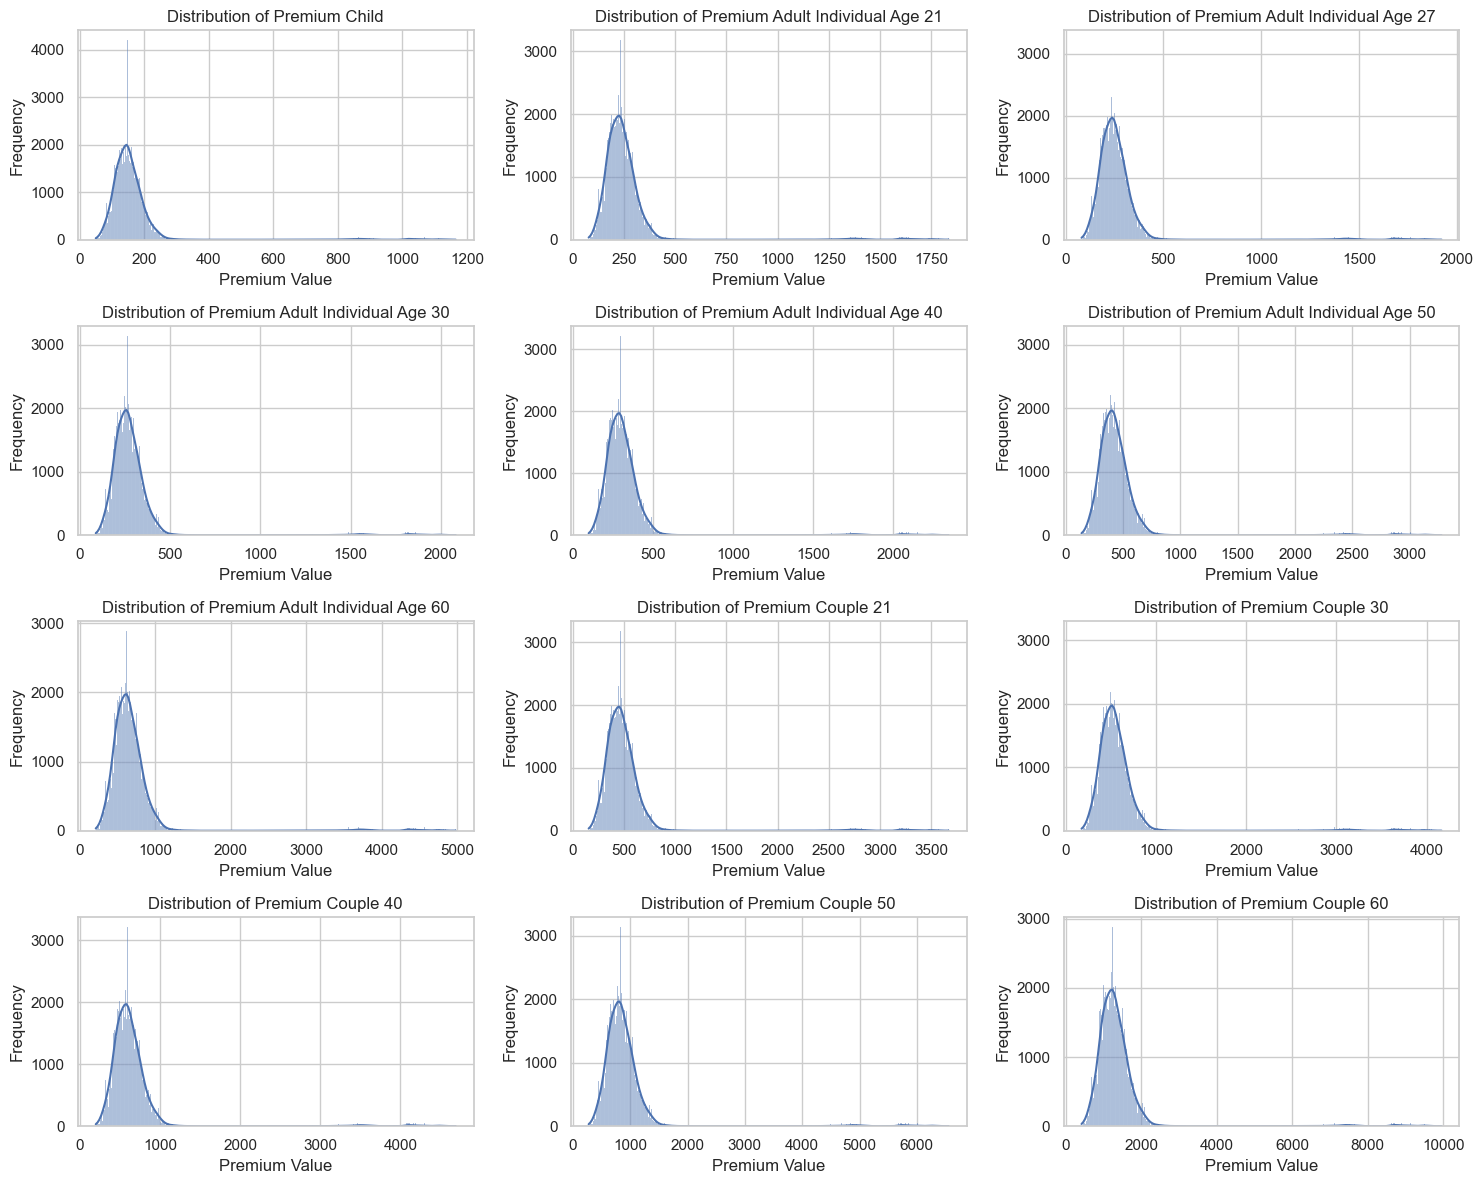

In [277]:
# Importing libraries for visualization of distributions
import seaborn as sns

# Plotting the distributions of the premium columns with outliers
plt.figure(figsize=(15, 12))

for i, column in enumerate(premium_columns_to_check, 1):
    plt.subplot(4, 3, i)
    sns.histplot(healthcare_data_filtered[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel("Premium Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [278]:
# Removing outliers using the IQR method for each premium column

# Creating a copy of the dataset to preserve the original
healthcare_data_no_outliers = healthcare_data_filtered.copy()

# Removing outliers in each premium column
for column in premium_columns_to_check:
    Q1 = healthcare_data_no_outliers[column].quantile(0.25)
    Q3 = healthcare_data_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define acceptable range for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    healthcare_data_no_outliers = healthcare_data_no_outliers[(healthcare_data_no_outliers[column] >= lower_bound) & 
                                                              (healthcare_data_no_outliers[column] <= upper_bound)]

# Checking the new shape of the dataset after outlier removal
healthcare_data_no_outliers.shape


(76313, 27)

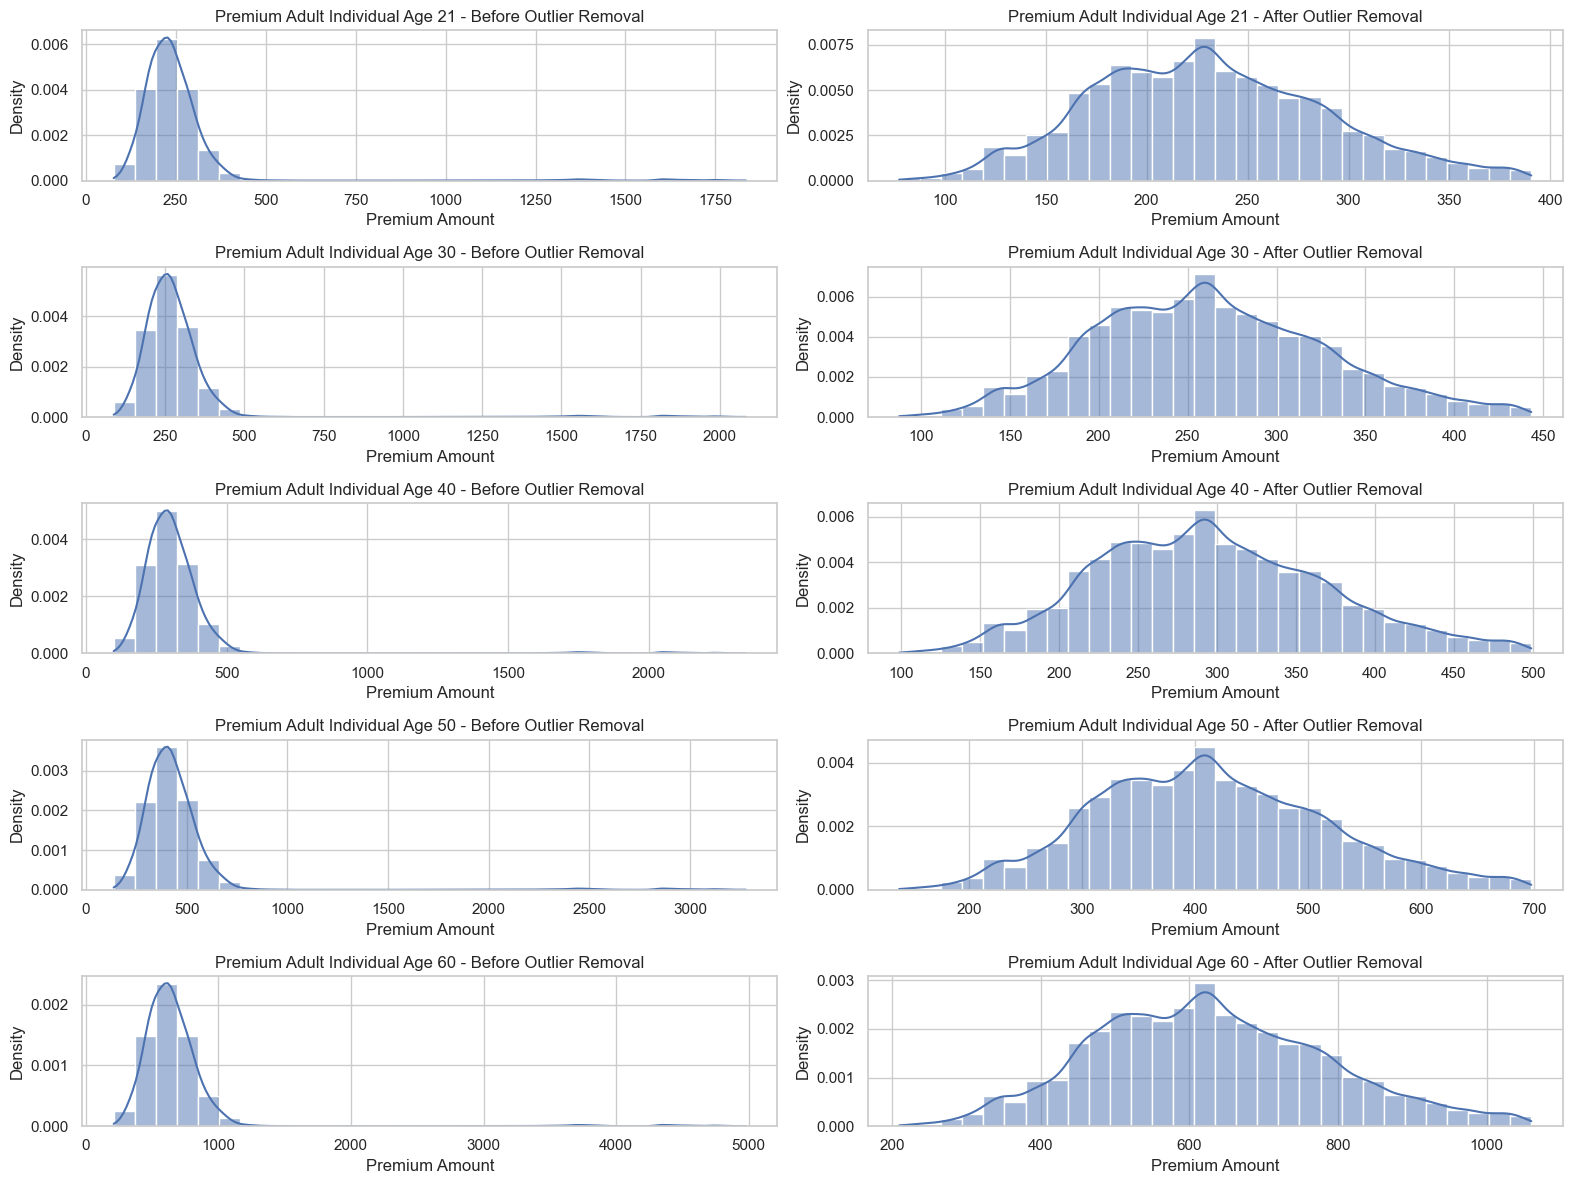

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of premium columns to check (replace with actual column names)
premium_columns_to_check = [
    'Premium Adult Individual Age 21', 'Premium Adult Individual Age 30', 
    'Premium Adult Individual Age 40', 'Premium Adult Individual Age 50', 
    'Premium Adult Individual Age 60'
]

# Plotting histograms with KDE for each premium column before and after outlier removal
plt.figure(figsize=(16, 12))

for i, column in enumerate(premium_columns_to_check):
    # Histogram and KDE before outlier removal
    plt.subplot(len(premium_columns_to_check), 2, 2*i + 1)
    sns.histplot(healthcare_data_filtered[column], kde=True, bins=30, stat="density")
    plt.title(f"{column} - Before Outlier Removal")
    plt.xlabel("Premium Amount")
    plt.ylabel("Density")
    
    # Histogram and KDE after outlier removal
    plt.subplot(len(premium_columns_to_check), 2, 2*i + 2)
    sns.histplot(healthcare_data_no_outliers[column], kde=True, bins=30, stat="density")
    plt.title(f"{column} - After Outlier Removal")
    plt.xlabel("Premium Amount")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


# log transformation

In [280]:

# Define relevant premium columns and clean data to remove outliers, as per previous steps
premium_columns = [
    'Premium Child', 'Premium Adult Individual Age 21', 'Premium Adult Individual Age 27', 
    'Premium Adult Individual Age 30', 'Premium Adult Individual Age 40', 
    'Premium Adult Individual Age 50', 'Premium Adult Individual Age 60', 
    'Premium Couple 21  ', 'Premium Couple 30', 'Premium Couple 40', 
    'Premium Couple 50', 'Premium Couple 60'
]


# Apply log transformation to each premium column
healthcare_data_log_transformed = healthcare_data_filtered.copy()
for column in premium_columns:
    healthcare_data_log_transformed[column] = np.log1p(healthcare_data_log_transformed[column])

# Check the shape of the dataset after log transformation
healthcare_data_log_transformed_shape = healthcare_data_log_transformed.shape
healthcare_data_log_transformed_shape



(78379, 27)

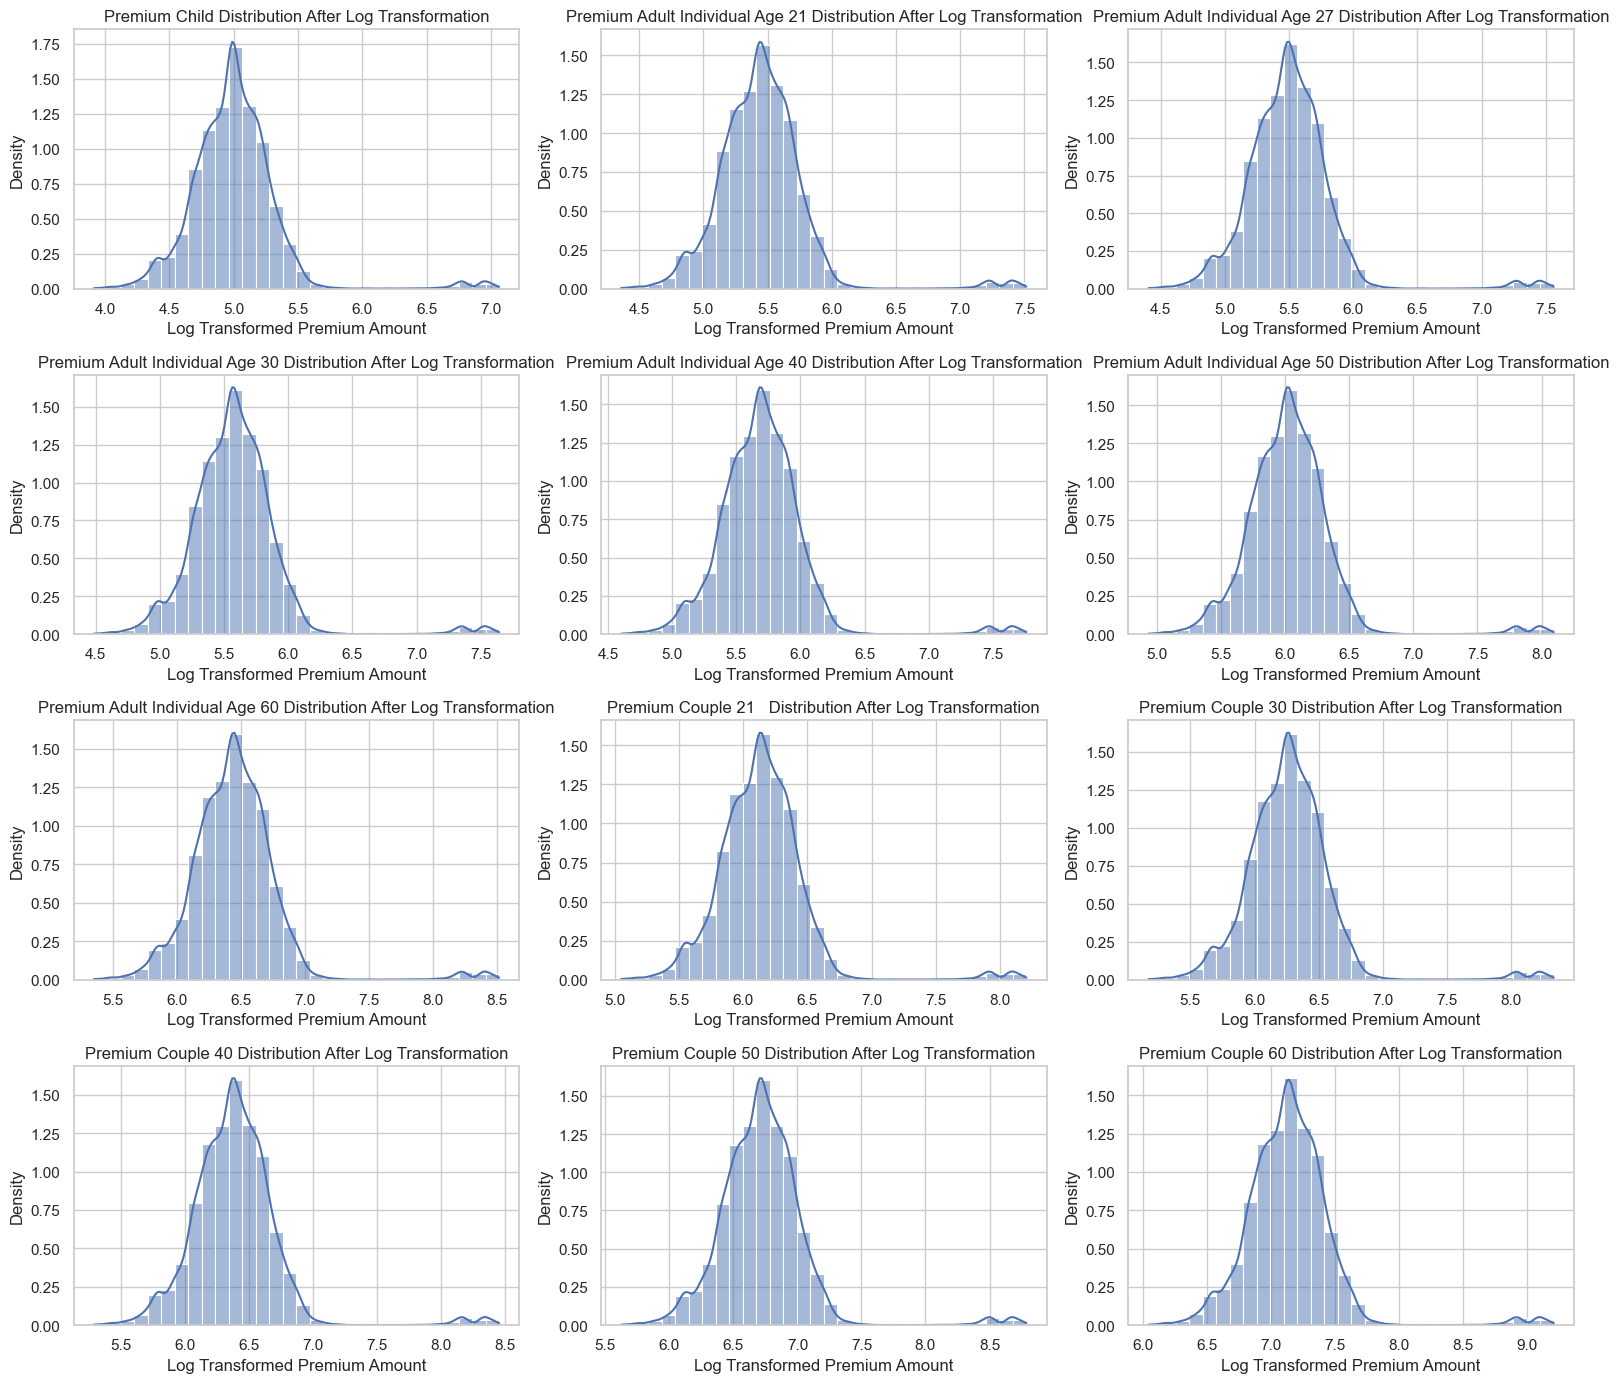

In [281]:
# Plot histograms with density overlay for each premium column after log transformation
plt.figure(figsize=(16, 14))
for i, column in enumerate(premium_columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(healthcare_data_log_transformed[column], kde=True, stat="density", bins=30)
    plt.title(f"{column} Distribution After Log Transformation")
    plt.xlabel("Log Transformed Premium Amount")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


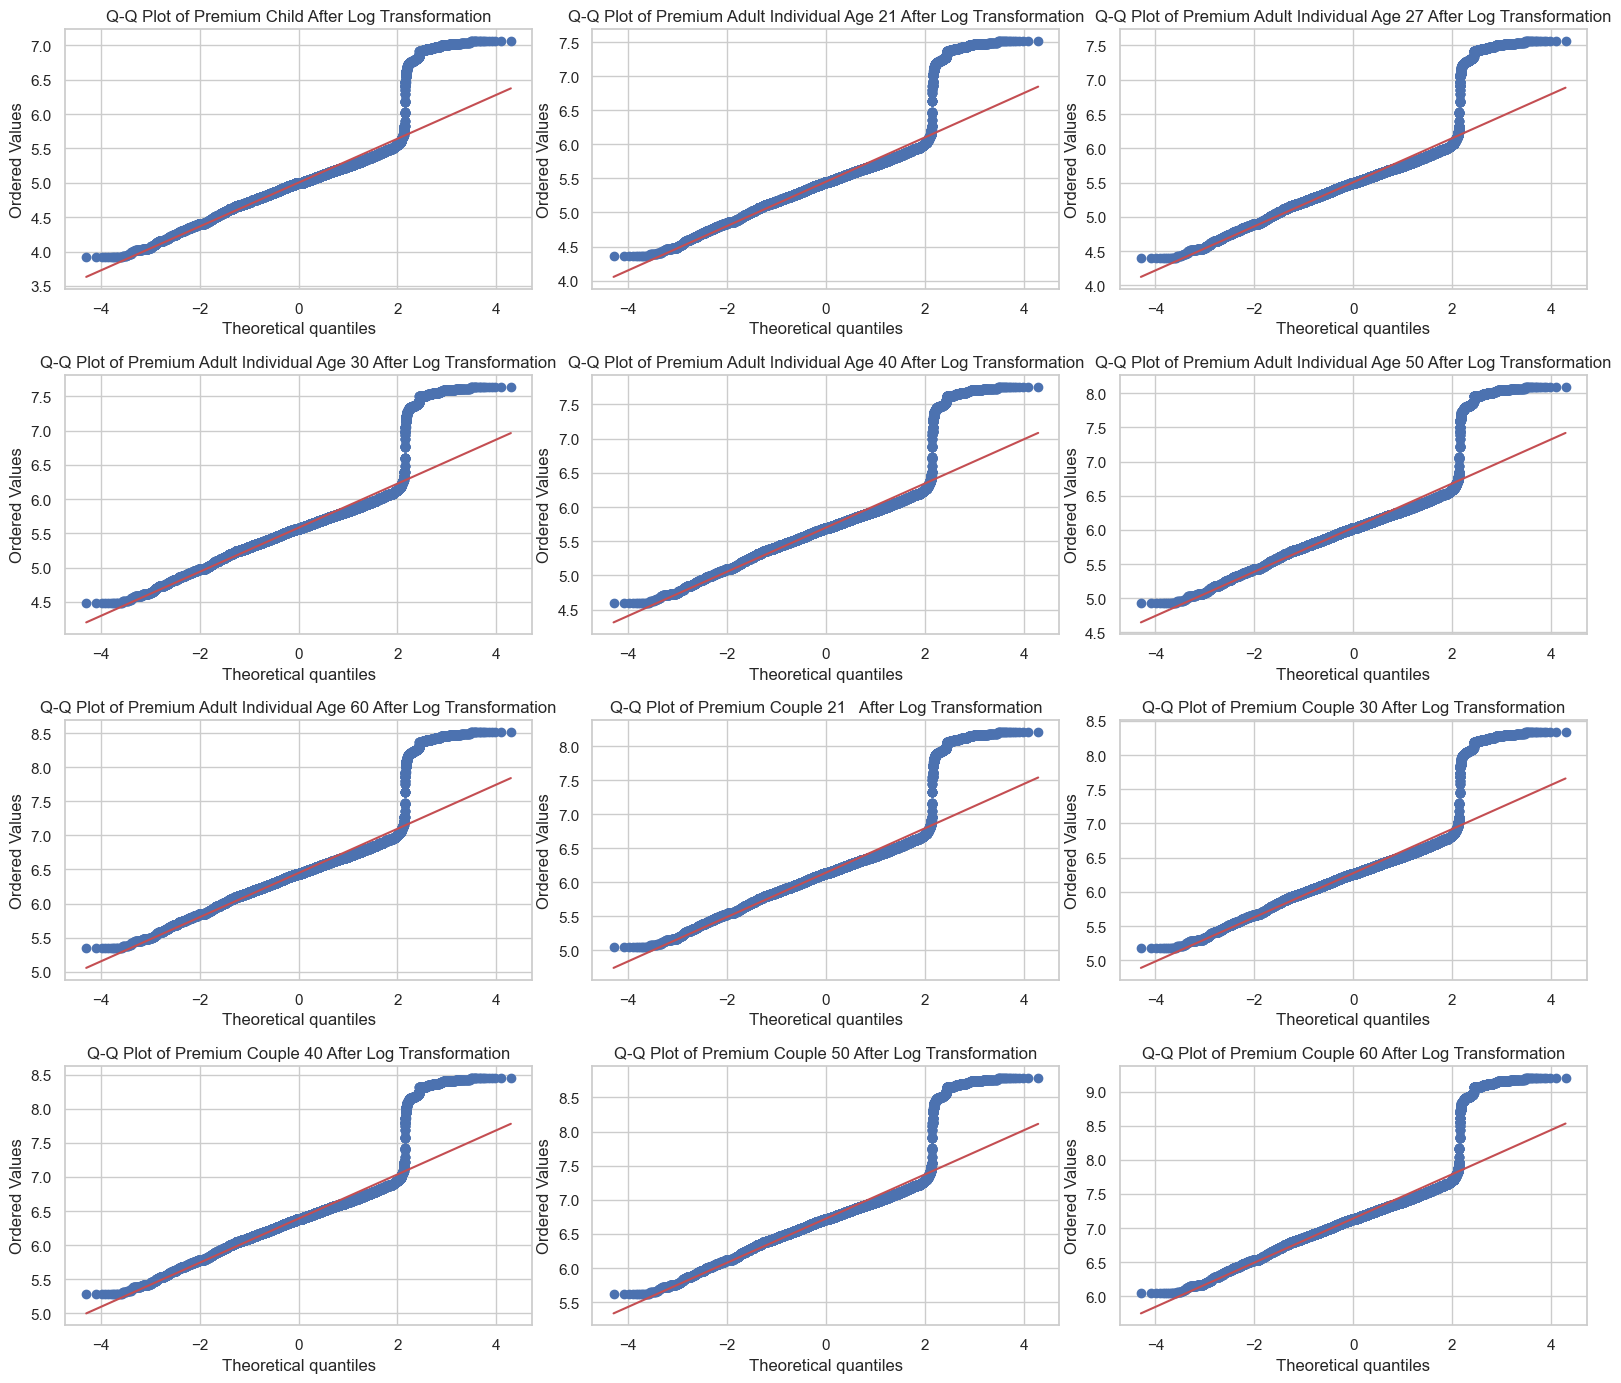

In [282]:
import scipy.stats as stats

# Q-Q plots for each premium column after log transformation
plt.figure(figsize=(16, 14))
for i, column in enumerate(premium_columns):
    plt.subplot(4, 3, i+1)
    stats.probplot(healthcare_data_log_transformed[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {column} After Log Transformation")

plt.tight_layout()
plt.show()


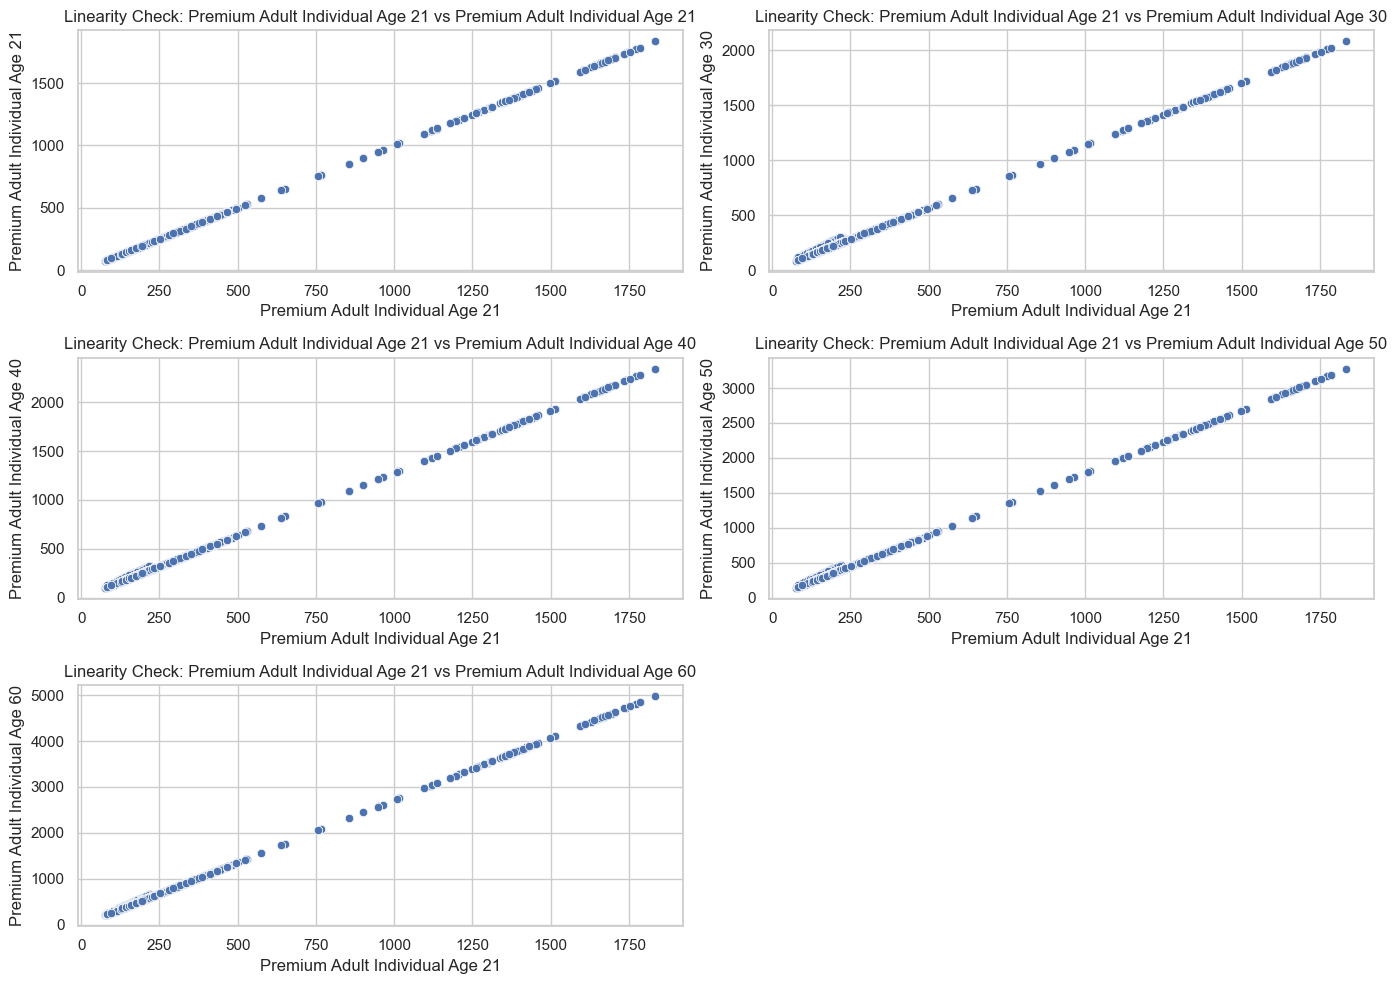

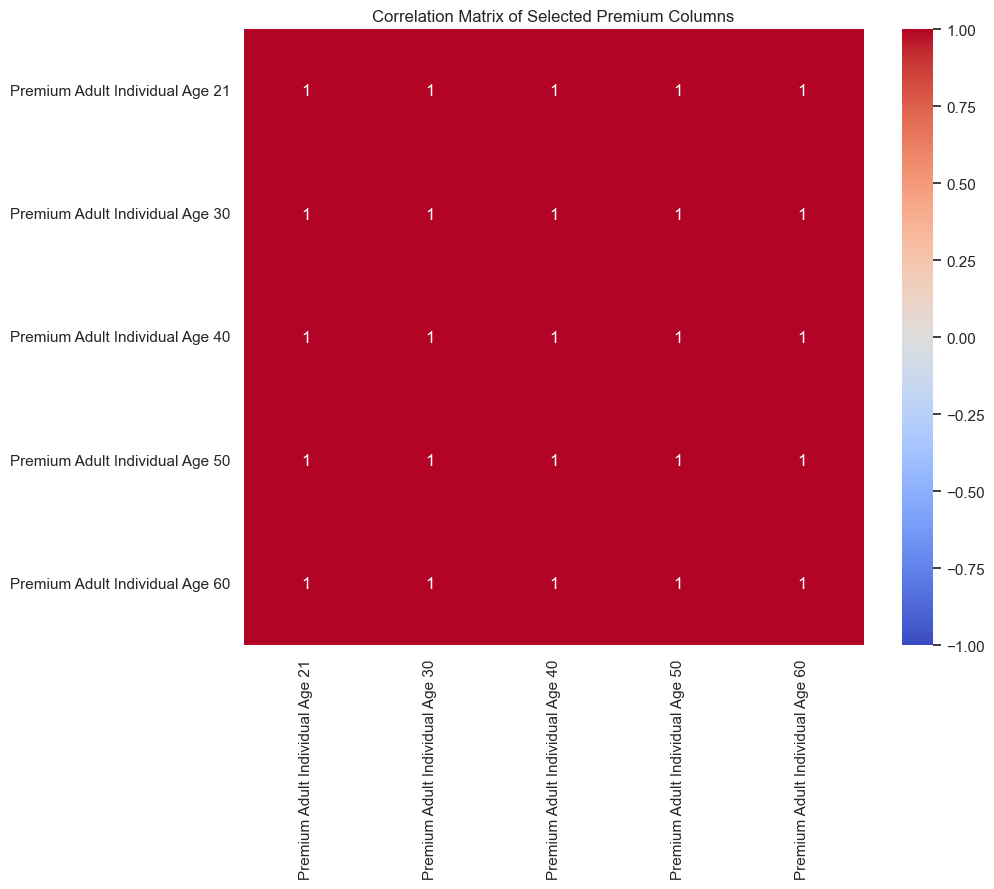

In [283]:

# Selecting representative premium columns to examine potential linear relationships
premium_columns = [
    'Premium Adult Individual Age 21', 'Premium Adult Individual Age 30', 
    'Premium Adult Individual Age 40', 'Premium Adult Individual Age 50', 
    'Premium Adult Individual Age 60'
]

# Plotting scatter plots to examine linearity between premiums for different age groups
plt.figure(figsize=(14, 10))
for i, column in enumerate(premium_columns):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=healthcare_data_filtered['Premium Adult Individual Age 21'], y=healthcare_data_filtered[column])
    plt.title(f"Linearity Check: Premium Adult Individual Age 21 vs {column}")
    plt.xlabel("Premium Adult Individual Age 21")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Correlation matrix to observe linear relationships between premium columns
correlation_matrix = healthcare_data_filtered[premium_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Premium Columns")
plt.show()


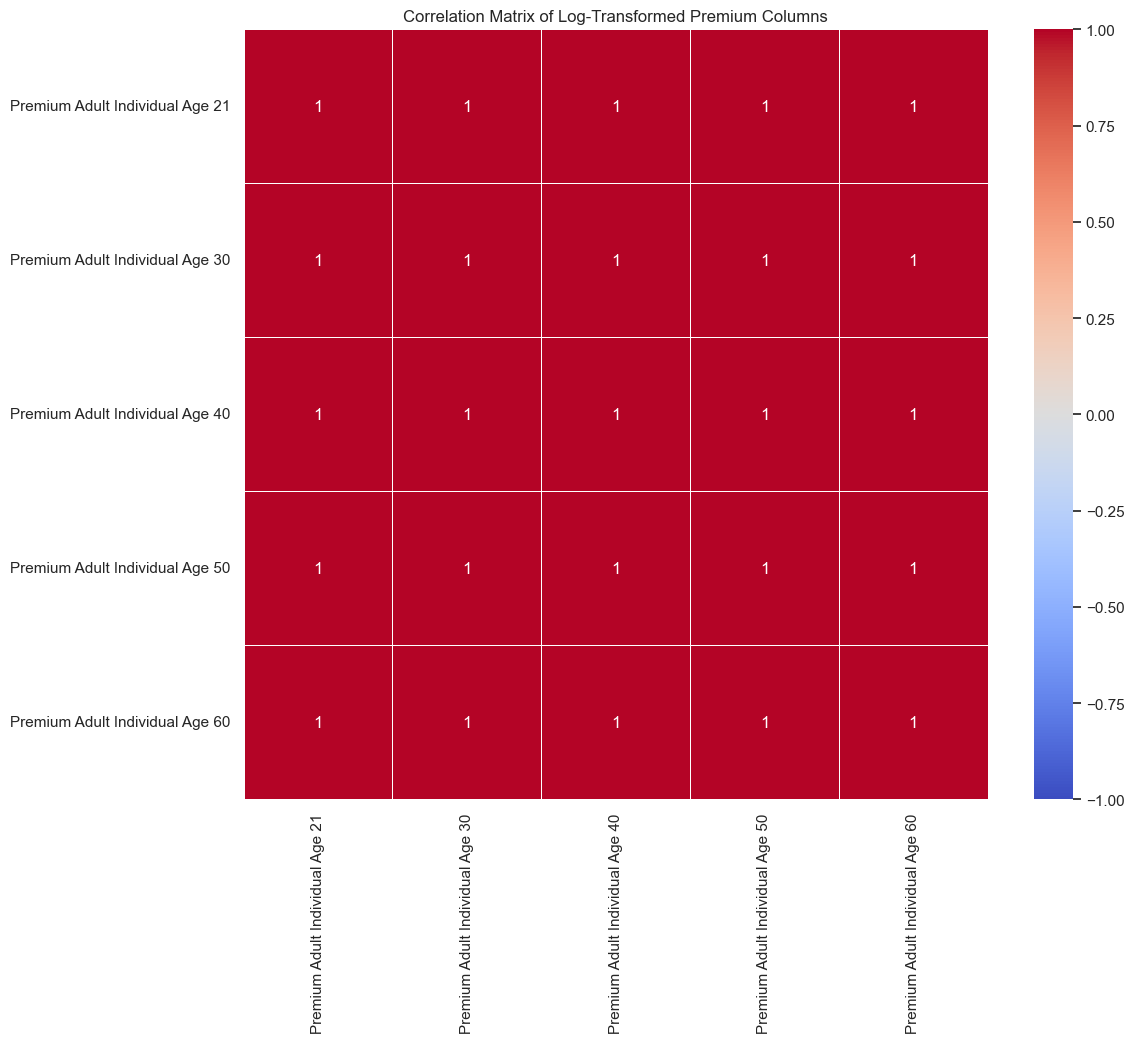

In [284]:
# Calculate the correlation matrix for the log-transformed premium columns
correlation_matrix = healthcare_data_log_transformed[premium_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Log-Transformed Premium Columns")
plt.show()

In [285]:
# Display column names to identify exact names
print(healthcare_data_filtered.columns)


Index(['State', 'County', 'Metal Level', 'Plan Type', 'Premium Child',
       'Premium Adult Individual Age 21', 'Premium Adult Individual Age 27',
       'Premium Adult Individual Age 30', 'Premium Adult Individual Age 40',
       'Premium Adult Individual Age 50', 'Premium Adult Individual Age 60',
       'Premium Couple 21  ', 'Premium Couple 30', 'Premium Couple 40',
       'Premium Couple 50', 'Premium Couple 60',
       'Medical Deductible - individual - standard',
       'Medical Deductible -family - standard',
       'Medical Maximum Out Of Pocket - individual - standard',
       'Medical Maximum Out of Pocket - family - standard',
       'Primary Care Physician  - standard', 'Specialist  - standard',
       'Emergency Room  - standard', 'Generic Drugs - standard',
       'Preferred Brand Drugs - standard',
       'Non-preferred Brand Drugs - standard', 'Specialty Drugs - standard'],
      dtype='object')


In [196]:
# Check the exact column names in your dataset
print(healthcare_data_log_transformed.columns)


Index(['State', 'County', 'Metal Level', 'Plan Type', 'Premium Child',
       'Premium Adult Individual Age 21', 'Premium Adult Individual Age 27',
       'Premium Adult Individual Age 30', 'Premium Adult Individual Age 40',
       'Premium Adult Individual Age 50', 'Premium Adult Individual Age 60',
       'Premium Couple 21  ', 'Premium Couple 30', 'Premium Couple 40',
       'Premium Couple 50', 'Premium Couple 60',
       'Medical Deductible - individual - standard',
       'Medical Deductible -family - standard',
       'Medical Maximum Out Of Pocket - individual - standard',
       'Medical Maximum Out of Pocket - family - standard',
       'Primary Care Physician  - standard', 'Specialist  - standard',
       'Emergency Room  - standard', 'Generic Drugs - standard',
       'Preferred Brand Drugs - standard',
       'Non-preferred Brand Drugs - standard', 'Specialty Drugs - standard'],
      dtype='object')


# 3RD Question

In [288]:
import numpy as np

# List of numerical columns to clean
numerical_cols = [
    'Medical Deductible - individual - standard',
    'Medical Maximum Out Of Pocket - individual - standard',
    'Primary Care Physician  - standard',
    'Specialist  - standard',
    'Emergency Room  - standard',
    'Generic Drugs - standard',
    'Preferred Brand Drugs - standard',
    'Non-preferred Brand Drugs - standard',
    'Specialty Drugs - standard'
]

# Replace non-numeric values like 'Not Applicable' with NaN
for col in numerical_cols:
    data[col] = data[col].replace('[\$,]', '', regex=True)  # Remove $ and ,
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to float, invalid values become NaN

# Drop rows with missing values in numerical columns
data = data.dropna(subset=numerical_cols)

# Scale the cleaned numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define features and target variable
X = data.drop(columns=['Premium Adult Individual Age 40'])  # Features
y = data['Premium Adult Individual Age 40']  # Target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1956, 12), (489, 12), (1956,), (489,))

In [289]:
# Clean and convert numerical columns to numeric values
numerical_cols = [
    'Medical Deductible - individual - standard',
    'Medical Maximum Out Of Pocket - individual - standard',
    'Primary Care Physician  - standard',
    'Specialist  - standard',
    'Emergency Room  - standard',
    'Generic Drugs - standard',
    'Preferred Brand Drugs - standard',
    'Non-preferred Brand Drugs - standard',
    'Specialty Drugs - standard'
]

# Removing non-numeric characters (e.g., "$", ",") and converting to float
for col in numerical_cols:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Now scale the cleaned numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Continue with feature and target variable preparation
X = data.drop(columns=['Premium Adult Individual Age 40'])  # Features
y = data['Premium Adult Individual Age 40']  # Target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1956, 12), (489, 12), (1956,), (489,))

In [290]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the XGBoost regression model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Display the evaluation metrics
print("XGBoost Regression Results:")
print(f"R²: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")


XGBoost Regression Results:
R²: 0.7602
MAE: 22.0212
RMSE: 30.0511


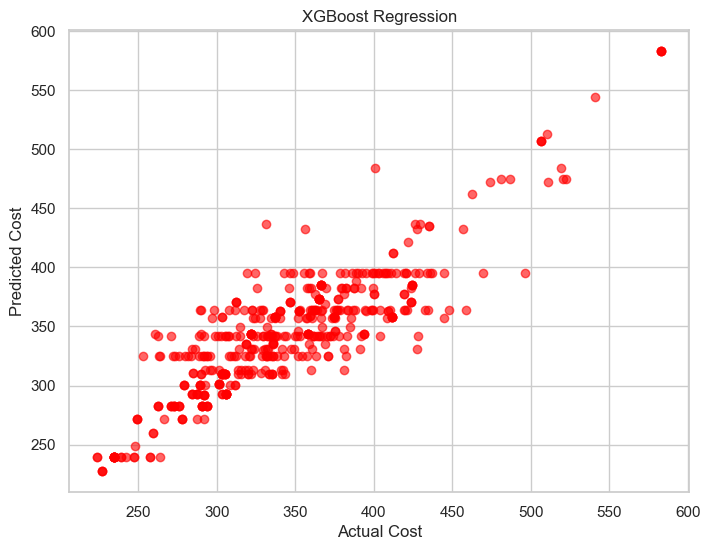

In [292]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='red', alpha=0.6)
plt.title('XGBoost Regression')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.grid(True)
plt.show()


In [293]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # Default k=5

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Display the evaluation metrics
print("KNN Regression Results:")
print(f"R²: {r2_knn:.4f}")
print(f"MAE: {mae_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")


KNN Regression Results:
R²: 0.7299
MAE: 23.6640
RMSE: 31.8911


     k        R²        MAE       RMSE
0    1  0.410216  32.911943  47.126166
1    2  0.683266  24.927648  34.535287
2    3  0.716362  23.999966  32.681167
3    4  0.716980  24.459325  32.645565
4    5  0.729910  23.664020  31.891135
5    6  0.722687  23.995559  32.314723
6    7  0.721856  23.978829  32.363116
7    8  0.720626  24.289688  32.434578
8    9  0.717086  24.444915  32.639441
9   10  0.717913  24.492894  32.591677
10  11  0.722835  24.391156  32.306125
11  12  0.722273  24.490097  32.338872
12  13  0.728922  24.108919  31.949399
13  14  0.728662  24.234014  31.964727
14  15  0.725244  24.426822  32.165409
15  16  0.721963  24.628942  32.356921
16  17  0.720673  24.725260  32.431848
17  18  0.716422  24.875719  32.677722
18  19  0.714176  24.969950  32.806899
19  20  0.714115  24.990837  32.810377


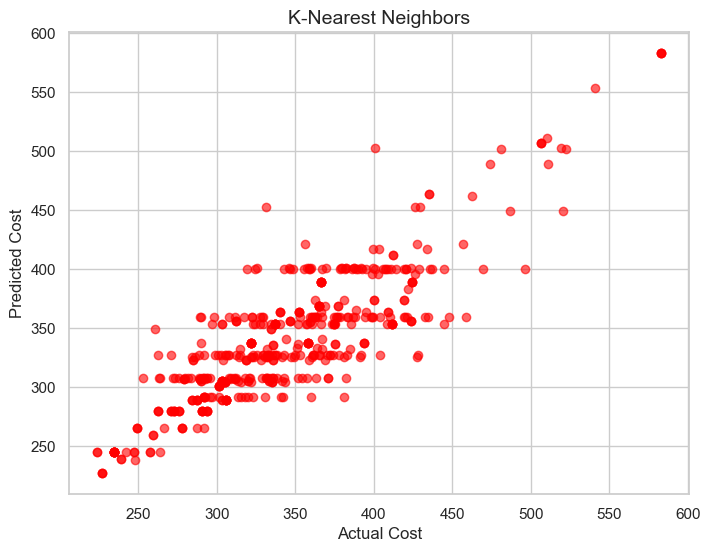

In [295]:
# Evaluate KNN with different values of k
results = []
for k in range(1, 21):  # Test k values from 1 to 20
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((k, r2, mae, rmse))

# Convert results to a DataFrame for easy visualization
import pandas as pd
results_df = pd.DataFrame(results, columns=['k', 'R²', 'MAE', 'RMSE'])
print(results_df)

# Plotting Predicted vs Actual Costs for KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='red', alpha=0.6)
plt.title("K-Nearest Neighbors", fontsize=14)
plt.xlabel("Actual Cost", fontsize=12)
plt.ylabel("Predicted Cost", fontsize=12)
plt.grid(True)
plt.show()


# 1 Question

In [234]:

# Filtering the necessary columns
selected_columns_refined = [
    'State', 'County', 'Metal Level', 'Plan Type',
    'Premium Child', 'Premium Adult Individual Age 21', 'Premium Adult Individual Age 27', 
    'Premium Adult Individual Age 30', 'Premium Adult Individual Age 40', 
    'Premium Adult Individual Age 50', 'Premium Adult Individual Age 60', 
    'Premium Couple 21  ', 'Premium Couple 30', 'Premium Couple 40', 
    'Premium Couple 50', 'Premium Couple 60'
]

# Extracting the filtered dataset for analysis
healthcare_data_filtered = health_care_data[selected_columns_refined]


# Filling missing values in premium columns with their median values
for column in premium_columns_to_check:
    healthcare_data_filtered[column].fillna(healthcare_data_filtered[column].median(), inplace=True)

# Grouping data by 'Metal Level' and 'Plan Type' and calculating the average premium for each combination
average_premiums_by_metal_type = healthcare_data_filtered.groupby(['Metal Level', 'Plan Type'])[premium_columns_to_check].mean()

# Displaying the average premiums by metal level and plan type for analysis
average_premiums_by_metal_type


/var/folders/8c/pc9_g8b96hs6d8ycg72172200000gn/T/ipykernel_73408/3627222710.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Premium Adult Individual Age 21  \
Metal Level  Plan Type                                    
Bronze       EPO                             211.939800   
             HMO                             279.425974   
             POS                             212.708805   
             PPO                             202.921460   
Catastrophic EPO                             183.155125   
             HMO                             254.462457   
             POS                             149.322783   
             PPO                             168.561764   
Gold         EPO                             280.108935   
             HMO                             319.917374   
             POS                             293.207470   
             PPO                             281.322694   
Platinum     EPO                             302.335754   
             HMO                             314.972813   
             POS                             314.959477   
             PPO                             293.190108   
Silver       EPO                             247.716135   
             HMO                             264.574746   
             POS                             252.468309   
             PPO                             240.150321   

                        Premium Adult Individual Age 30  \
Metal Level  Plan Type                                    
Bronze       EPO                             240.559415   
             HMO                             319.151973   
             POS                             242.214684   
             PPO                             230.418953   
Catastrophic EPO                             207.881253   
             HMO                             290.020797   
             POS                             170.212654   
             PPO                             191.641878   
Gold         EPO                             317.931531   
             HMO                             366.326888   
             POS                             333.421087   
             PPO                             319.438831   
Platinum     EPO                             343.168784   
             HMO                             357.623727   
             POS                             357.463140   
             PPO                             332.767082   
Silver       EPO                             281.168699   
             HMO                             303.778428   
             POS                             287.006033   
             PPO                             272.653922   

                        Premium Adult Individual Age 40  \
Metal Level  Plan Type                                    
Bronze       EPO                             270.865649   
             HMO                             358.682792   
             POS                             272.467630   
             PPO                             259.423812   
Catastrophic EPO                             234.072574   
             HMO                             326.158189   
             POS                             191.416385   
             PPO                             215.673857   
Gold         EPO                             357.987226   
             HMO                             411.389214   
             POS                             375.224764   
             PPO                             359.645657   
Platinum     EPO                             386.402075   
             HMO                             402.639972   
             POS                             402.516953   
             PPO                             374.696894   
Silver       EPO                             316.590819   
             HMO                             340.875707   
             POS                             323.021812   
             PPO                             306.975956   

                        Premium Adult Individual Age 50  \
Metal Level  Plan Type                                    
Bronze   

Here’s a detailed analysis of the results, along with assumptions based on typical insurance market patterns:

1. Metal Level Trends:
Bronze Plans: Generally have the lowest premiums across all plan types. This is expected, as Bronze plans are designed with lower monthly premiums and higher out-of-pocket costs, appealing to younger or healthier individuals who anticipate lower healthcare usage.
Silver Plans (not shown in the sample): Typically offer a middle-ground option between Bronze and Gold in terms of premium cost. Silver plans often balance affordability with moderate cost-sharing, suitable for those needing more routine care.
Gold and Platinum Plans (if available): Higher premiums in these tiers reflect greater coverage, meaning lower out-of-pocket costs for enrollees. These plans are more likely chosen by individuals or families needing frequent healthcare services.

2. Plan Type Trends:
HMO (Health Maintenance Organization): Shows higher premiums than other plan types in the same metal level (particularly noticeable in Bronze). HMOs generally provide more coordinated care but require enrollees to stay within a specific network and often need referrals for specialists. The premium costs reflect the more extensive management and coordination within the network.
PPO (Preferred Provider Organization): Generally offers slightly lower premiums than HMOs within the same metal level. PPOs allow more flexibility with access to out-of-network providers at a higher cost, making them suitable for those who value choice over structured, in-network care.
EPO (Exclusive Provider Organization) and POS (Point of Service): Both EPO and POS plans show premiums similar to or slightly lower than PPOs. EPOs restrict enrollees to a specific network, which keeps costs down but limits flexibility. POS plans often combine features of both HMO and PPO but typically come with lower premiums.

3. Age-Related Premium Variations:
Younger Ages (Child to 30): Premiums for these age groups are lower across all metal levels and plan types, reflecting the lower risk associated with younger, generally healthier enrollees.
Older Ages (40 to 60): Premiums increase significantly with age, consistent with actuarial pricing in health insurance. This reflects the higher healthcare needs and risks associated with aging, such as chronic conditions, which result in more frequent or expensive healthcare utilization.

4. Household Composition and Premium Variations:
Individual vs. Couple: Premiums for couples are notably higher than for individual adults across all metal levels and plan types. This is expected because couples are effectively two covered lives, increasing the insurer’s risk and potential payout.

Higher Premiums for Couples 50+: Premiums for couples aged 50 and above are significantly higher, likely due to the increased likelihood of healthcare utilization among older couples. These couples often seek comprehensive coverage to reduce the financial burden of medical expenses.
Assumptions:

Demand vs. Risk Balance:
Premiums increase with metal levels and plan types with greater coverage (e.g., HMO in Platinum) due to insurers managing risk and providing extensive services. Enrollees choosing higher coverage likely anticipate needing more medical services, which the insurer balances with higher premiums.

Healthcare Usage and Cost Control:
Insurers set higher premiums for HMO plans due to the coordination involved, which generally reduces unnecessary healthcare spending. PPOs and EPOs, with more flexibility, assume a lower level of provider coordination, thus resulting in slightly lower premiums within the same metal tier.

Age-Based Pricing:
The increase in premiums by age aligns with actuarial principles, as older enrollees statistically incur higher healthcare costs. Insurers use age as a risk factor to predict utilization and set prices accordingly.

Market-Specific Factors:
While the dataset provides national averages, there may be regional factors (e.g., cost of living, state regulations) that influence pricing in actual market conditions.

Overall Summary:
Affordability vs. Coverage Trade-Off: Lower metal levels and flexible plan types (PPO/EPO) are generally more affordable but come with higher out-of-pocket costs. Higher tiers like Gold and Platinum, especially with HMO plans, offer more comprehensive coverage but demand higher premiums.

Target Demographics:
Bronze and Silver Plans: Often selected by younger or healthier individuals with limited healthcare needs.
Gold and Platinum Plans: Favored by those needing regular care or expecting higher medical costs, as the higher premium offsets the lower out-of-pocket expenses.

This breakdown helps consumers and insurers align premiums with anticipated healthcare usage, balancing affordability with coverage, and managing risk across age groups and household types. Let me know if you’d like to delve further into specific segments or cross-reference additional data!

In [235]:
# Select relevant columns for the analysis
relevant_columns = ['Metal Level', 'Plan Type', 'Premium Adult Individual Age 40']
data_subset = health_care_data[relevant_columns].dropna()

# Summary statistics for premiums by metal levels and plan types
premium_summary = data_subset.groupby(['Metal Level', 'Plan Type'])['Premium Adult Individual Age 40'].agg(['mean', 'median', 'std', 'min', 'max'])
print(premium_summary)


                              mean   median         std     min      max
Metal Level  Plan Type                                                  
Bronze       EPO        270.510058  266.730   41.992417  164.06   402.56
             HMO        358.682792  257.700  412.377282  132.35  2238.69
             POS        272.467630  248.290  170.293608  147.16  1543.80
             PPO        258.311313  241.450  149.863787  122.39  1709.00
Catastrophic EPO        234.072574  234.800   33.447540  119.54   361.50
             HMO        326.158189  210.680  451.301725  104.64  2281.02
             POS        191.416385  167.530  122.833764   98.76   979.19
             PPO        215.673857  192.150  185.532775  103.40  1645.00
Gold         EPO        358.992847  357.200   48.409415  212.20   570.21
             HMO        411.935863  370.500  246.703752  189.01  2344.64
             POS        375.224764  351.290  199.556862  216.92  2121.17
             PPO        361.284037  353.000  119.78

# 1 Question

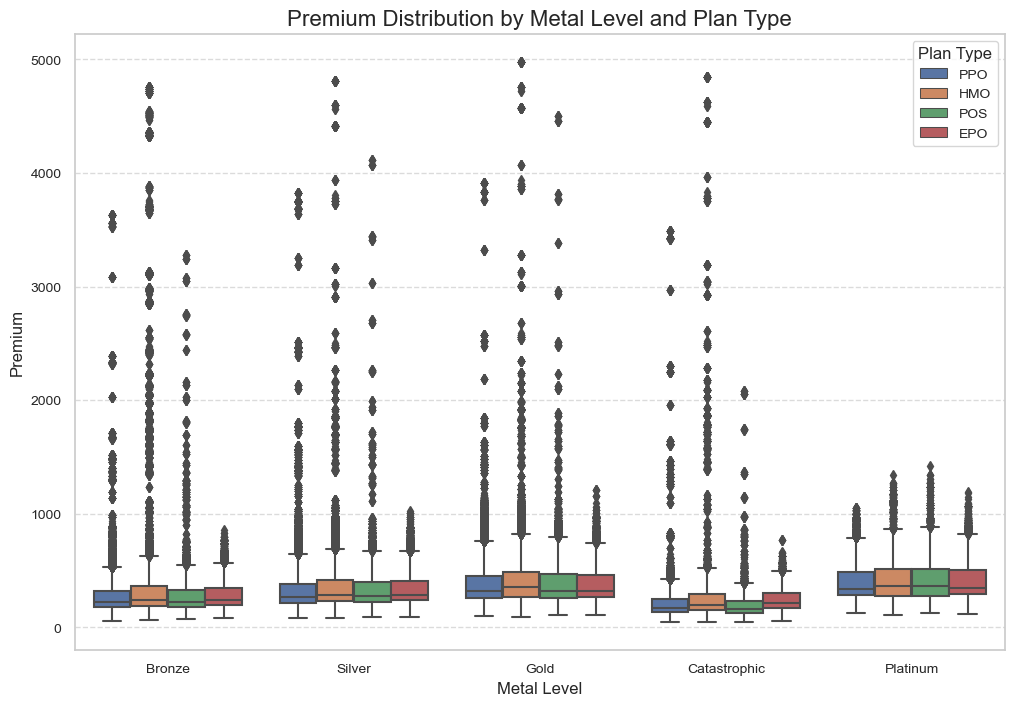

In [132]:
# Update the id_vars and premium_columns with the correct column names
id_vars = ['Metal_Level', 'Plan_Type']
premium_columns = [
    'Premium Child',
    'Premium Adult Individual Age 21',
    'Premium Adult Individual Age 27',
    'Premium Adult Individual Age 30',
    'Premium_Adult_Individual_Age_40',  # Fixed the underscore
    'Premium Adult Individual Age 50',
    'Premium Adult Individual Age 60',
]

# Melt the dataset for easier visualization
premium_data = healthcare_data_filtered.melt(
    id_vars=id_vars, 
    value_vars=premium_columns, 
    var_name='Age_Group', 
    value_name='Premium'
)

# Boxplot: Visualizing premium distribution by Metal Level
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=premium_data, x='Metal_Level', y='Premium', hue='Plan_Type')
plt.title('Premium Distribution by Metal Level and Plan Type', fontsize=16)
plt.xlabel('Metal Level', fontsize=12)
plt.ylabel('Premium', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Plan Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



/var/folders/8c/pc9_g8b96hs6d8ycg72172200000gn/T/ipykernel_73408/3912297837.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




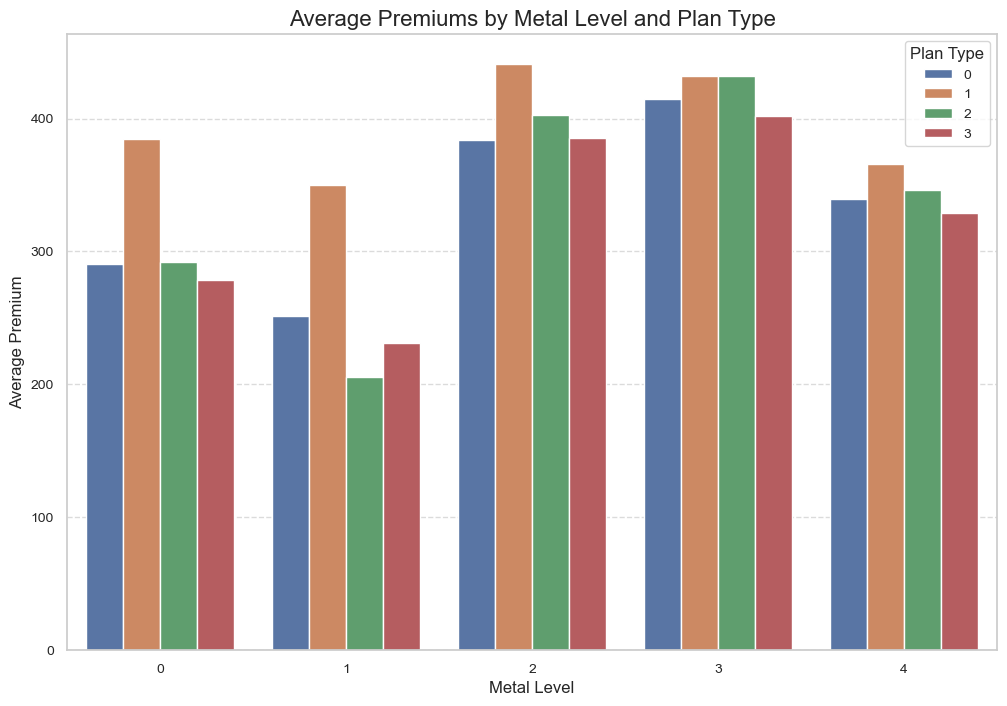

Metal_Level  Plan_Type  Age_Group     Premium
0             0          0        3.0  290.547359
1             0          1        3.0  384.858293
2             0          2        3.0  292.296265
3             0          3        3.0  278.266144
4             1          0        3.0  251.079509
5             1          1        3.0  349.997908
6             1          2        3.0  205.352576
7             1          3        3.0  231.357945
8             2          0        3.0  383.998381
9             2          1        3.0  441.336895
10            2          2        3.0  402.511685
11            2          3        3.0  385.615540
12            3          0        3.0  414.478541
13            3          1        3.0  431.985027
14            3          2        3.0  431.759557
15            3          3        3.0  401.921205
16            4          0        3.0  339.595408
17            4          1        3.0  365.779020
18            4          2        3.0  346.508153
19            4          3        3.0  329.184460

In [197]:
# Barplot: Average premiums by Metal Level and Plan Type
grouped_premiums = premium_data.groupby(['Metal_Level', 'Plan_Type']).mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_premiums, x='Metal_Level', y='Premium', hue='Plan_Type', ci=None)
plt.title('Average Premiums by Metal Level and Plan Type', fontsize=16)
plt.xlabel('Metal Level', fontsize=12)
plt.ylabel('Average Premium', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Plan Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display grouped data for further analysis
grouped_premiums


In [236]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Select relevant columns for regression
columns_for_regression = [
    'Premium Child', 'Premium Adult Individual Age 21', 'Premium Adult Individual Age 27',
    'Premium Adult Individual Age 30', 'Premium Adult Individual Age 40',
    'Premium Adult Individual Age 50', 'Premium Adult Individual Age 60',
    'Premium Couple 21  ', 'Premium Couple 30', 'Premium Couple 40',
    'Premium Couple 50', 'Premium Couple 60', 'State', 'County', 'Metal Level', 'Plan Type'
]
data = healthcare_data_filtered[columns_for_regression].dropna()

# Convert categorical features to numerical using Label Encoding
le = LabelEncoder()
for col in ['State', 'County', 'Metal Level', 'Plan Type']:
    data[col] = le.fit_transform(data[col])

# Define features (X) and target (y) - Plan Type as target
X_plan = data.drop(columns=['Metal Level'])
y_plan = data['Metal Level']

# Split data into training and testing sets
X_train_plan, X_test_plan, y_train_plan, y_test_plan = train_test_split(X_plan, y_plan, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2


# Train and evaluate models for Plan Type prediction
rf_plan = RandomForestRegressor(random_state=42)
mae_rf_plan, rmse_rf_plan, r2_rf_plan = train_and_evaluate(rf_plan, X_train_plan, X_test_plan, y_train_plan, y_test_plan)

print("\nPlan Type Prediction:")
print(f"Random Forest - MAE: {mae_rf_plan}, RMSE: {rmse_rf_plan}, R-squared: {r2_rf_plan}")



Plan Type Prediction:
Random Forest - MAE: 0.19216883461640566, RMSE: 0.5111523715053614, R-squared: 0.8990430464941704


# 2nd Question 

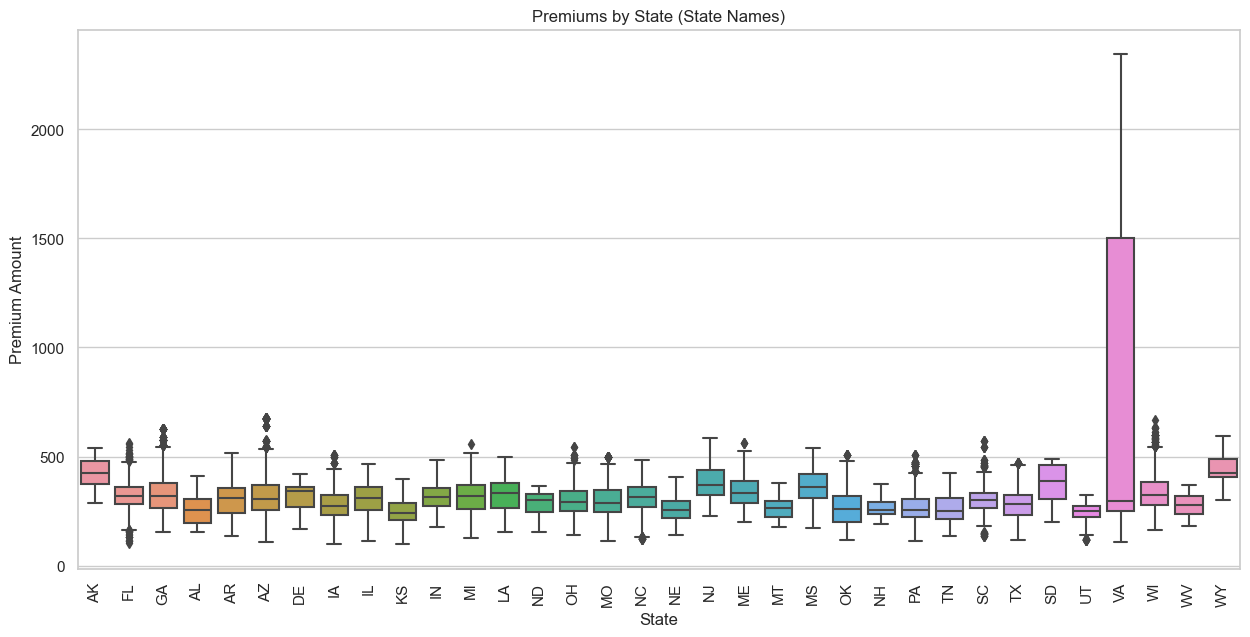

ANOVA Table:
                sum_sq       df           F  PR(>F)
C(State)  8.355112e+08     33.0  698.358506     0.0
Residual  2.804128e+09  77346.0         NaN     NaN
The state significantly impacts premiums (p < 0.05).


In [237]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter data for a specific premium column (e.g., Premium Adult Individual Age 40)
data = health_care_data[['State', 'Premium Adult Individual Age 40']].dropna()
# Use state names directly instead of numerical indices on the x-axis
plt.figure(figsize=(15, 7))
sns.boxplot(x='State', y='Premium Adult Individual Age 40', data=health_care_data)
plt.xticks(rotation=90)  # Rotate the state names for better readability
plt.title('Premiums by State (State Names)')
plt.ylabel('Premium Amount')
plt.xlabel('State')
plt.show()


# Step 3: Run ANOVA to test regional disparities
# Fit an ordinary least squares (OLS) model
model = ols('Q("Premium Adult Individual Age 40") ~ C(State)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 4: Display ANOVA results
print("ANOVA Table:")
print(anova_table)

# Step 5: Evaluate Model Significance
if anova_table['PR(>F)'][0] < 0.05:
    print("The state significantly impacts premiums (p < 0.05).")
else:
    print("No significant impact of state on premiums (p >= 0.05).")


In [138]:
import plotly.express as px

# Create a choropleth map
fig = px.choropleth(
    state_premiums,
    locations='State',
    locationmode='USA-states',
    color='Average Premium',
    hover_name='State',
    color_continuous_scale='Viridis',
    title='Average Premiums by State in the USA',
    scope='usa'
)

# Show the map
fig.show()


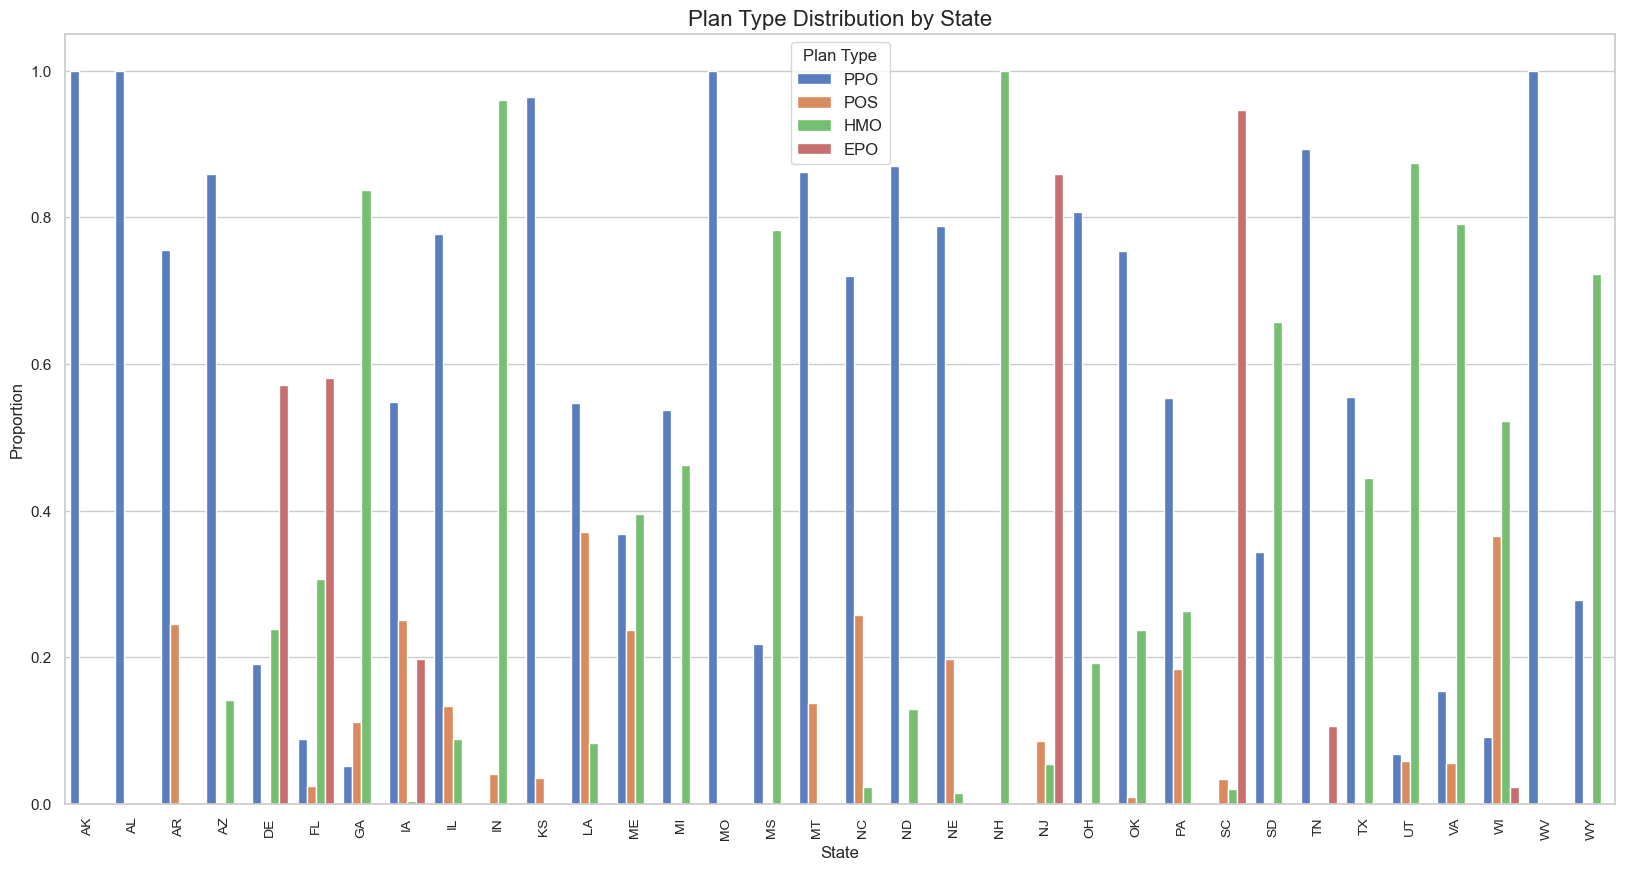

In [139]:
# Group by State and Plan Type to count the number of plans
plan_type_distribution = healthcare_data_filtered.groupby(['State', 'Plan_Type']).size().reset_index(name='Count')

# Normalize the counts within each state to calculate proportions
plan_type_distribution['Proportion'] = plan_type_distribution.groupby('State')['Count'].transform(lambda x: x / x.sum())

# Stacked bar plot: Plan Type distribution by state
plt.figure(figsize=(20, 10))
sns.barplot(
    data=plan_type_distribution,
    x='State',
    y='Proportion',
    hue='Plan_Type',
    palette='muted'
)
plt.title('Plan Type Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Plan Type', fontsize=12)
plt.show()
